<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

In [1]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

# IntML2020 - Teoría Bayesiana - Estimación

# Ejercicio 1. 

Utilice el ejemplo de scikit-learn para graficar las regiones de clasificacion lineal y cuadratica para Iris usando conjuntos de dos variables. 

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py
    


# *Respuesta* 

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
y = iris['target']


In [39]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

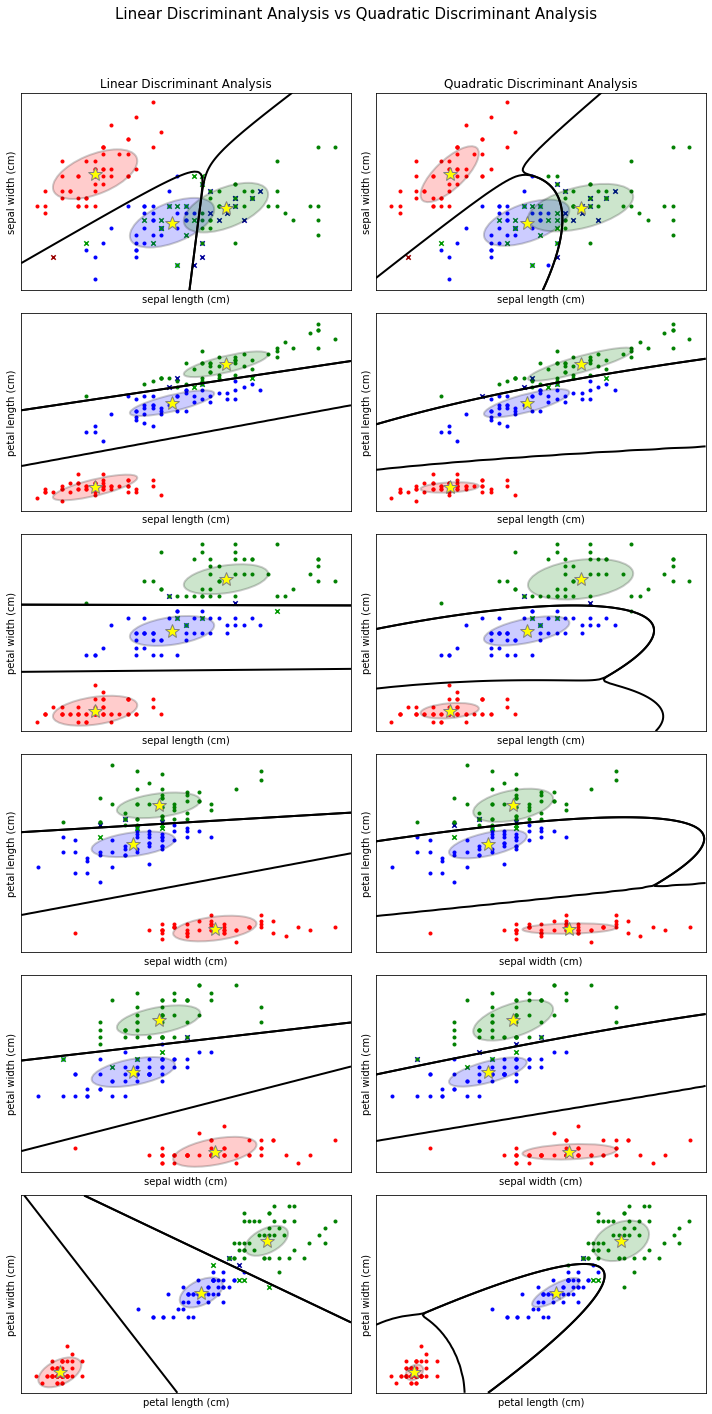

In [59]:

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def iris_permutations():
    iris = load_iris()
    X = iris['data']
    y = iris['target']
    datasets = []
    datasets.append((np.c_[X[:,0],X[:,1]],y))
    datasets.append((np.c_[X[:,0],X[:,2]],y))
    datasets.append((np.c_[X[:,0],X[:,3]],y))
    datasets.append((np.c_[X[:,1],X[:,2]],y))
    datasets.append((np.c_[X[:,1],X[:,3]],y))
    datasets.append((np.c_[X[:,2],X[:,3]],y))
    l0 = iris['feature_names'][0]
    l1 = iris['feature_names'][1]
    l2 = iris['feature_names'][2]
    l3 = iris['feature_names'][3]

    labels = [(l0,l1),(l0,l2),(l0,l3),(l1,l2),(l1,l3),(l2,l3)]
    return datasets,labels
# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index,labels):
    splot = plt.subplot(6, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

    tp = (y == y_pred)  # True Positive
    tp0, tp1,tp2 = tp[y == 0], tp[y == 1],tp[y == 2]
    X0, X1,X2 = X[y == 0], X[y == 1],X[y==2]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    X2_tp, X2_fp = X2[tp2], X2[~tp2]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 2: dots
    plt.scatter(X2_tp[:, 0], X2_tp[:, 1], marker='.', color='green')
    plt.scatter(X2_fp[:, 0], X2_fp[:, 1], marker='x',
                s=20, color='#009900')  # dark green

    # class 0 and 1 : areas
    nx, ny = 100, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 2].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')

    
    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[2][0], lda.means_[2][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')
    plot_ellipse(splot, lda.means_[2], lda.covariance_, 'green')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')
    plot_ellipse(splot, qda.means_[2], qda.covariance_[2], 'green')


plt.figure(figsize=(10, 20), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)
permutations,labels = iris_permutations()
for i, (X, y) in enumerate(permutations):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1,labels = labels[i])
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2,labels=labels[i])
    plot_qda_cov(qda, splot)
    plt.axis('tight')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

 <span style="color:red"> RESPONDA EL INCISO  AQUÍ </span>

# Ejercicio 2. 

* [a)] Ajuste los discriminantes lineales y cuadraticos sobre Iris con las 3 poblaciones. 

* [b)] Ajuste mezcla de Gaussianas para las tres poblaciones. Use la pagina 

https://scikit-learn.org/stable/modules/mixture.html

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html

https://www.kaggle.com/danielhanchen/gaussian-mixture-models-on-mnist-iris

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py


* [c)] Ajuste un clasificador del tipo Naive Bayes Gaussiano. 

https://scikit-learn.org/stable/modules/naive_bayes.html

Use la pagina 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

para armar comparaciones de todos los clasificadores anteriores. 

Diga como estima los parametros en cada caso. 

* [d]  Explique como utilizaria la curva ROC para realizar comparaciones sobre Iris con todos estos clasificadores. 

# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

# Ejercicio 3.

Supongamos que la variable $X$ tiene distribución exponencial

$$
	p(x|\theta)=\left\{
	\begin{array}{lcr}
		 \theta e^{-\theta x} & \ &\mbox{ si }x \geq0 \\
		 \ 0 &\ &\mbox{en caso contrario}\\
	\end{array}
	\right.
$$


* [a)] Grafique $p(x|\theta)$ versus $x$ para $\theta=1$. Grafique $p(x|\theta)$ versus $\theta$, $(0 \leq \theta \leq 5)$, para $x = 2$.

* [b)] Suponga que $n$ ejemplos $x_1 , \cdots , x_n$ se generan independientemente de acuerdo a $p(x|\theta)$. Muestre que el estimador de máxima verosimilitud para $\theta$ está dado por
$$\hat{\theta}=\frac{1}{\frac{1}{n}\sum_{k=1}^{n}{x_k}}$$

* [c)] En su gráfico generado con $\theta = 1$ en la parte a), marque el estimador de máxima verosimilitud $\hat{\theta}$ para $n$ grandes.



# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

# Ejercicio 4. 

Supongamos que la variable $X$ tiene distribución uniforme

$$
	p(x|\theta)\thicksim U(0,\theta)=\left\{
	\begin{array}{lcr}
		 {1}/{\theta} 	& \ 		&\mbox{ si }0 \leq x \leq \theta \\
		 \ 0 &\ &\mbox{en caso contrario}\\
	\end{array}
	\right.
$$

* [a)] Suponga que $n$ ejemplos $ D = \{ x_1,\ldots,x_n \} $ son generados independientemente de acuerdo a $p(x|\theta)$. Muestre que el estimador de máxima verosimilitud para $\theta$ es $max[D]$, esto es el valor del máximo elemento de $D$.
* [b)] Suponga que son generados $n=5$ puntos acorde con esta distribución y el maximo valor de esos puntos es  ${\max}_k (x_k)=0.6$. Grafique la verosimilitud $p(D|\theta)$ en el rango $0 \leq \theta \leq 1$. Explique con palabras por que no es necesario conocer los otros 4 puntos.



# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

# Ejercicio 5


Considere los modelos de clasificación con densidad Gaussiana en diferentes dimensiones:

* [a)] Escriba un programa para encontrar los valores de maxima verosimilitud $\hat\mu$ y $\hat\sigma^2$. Aplique su programa individualmente para cada una de las tres caracteristica $x_i$ de la categoria $w_1$ de la Tabla que se levanta como datos.data.

* [b)] Modifique su programa para aplicarlo a datos Gaussianos bidimensionales $p(x)\sim N(\mu,\Sigma)$. Aplique su programa para cadas una de las tres formas de apareamiento de a dos caracteristicas para $w_1$.
* [c)] Modifique su programa para aplicarlo a datos Gaussianos de tres dimensiones. Aplique su programa para a las tres dimensiones de la categoria $w_1$.
* [d)] Asuma que su modelo de tres dimensiones es separable, por lo tanto $\Sigma=diag(\sigma_1^2,\sigma_2^2,\sigma_3^2)$. Escriba un programa para estimar la media y los componentes diagonales de $\Sigma$. Aplique el programa a los datos en $w_2$.
* [e)] Compare los resultados para la media de cada caracteristica $\mu_i$ calculada en las formas previas. Explique por que son iguales o diferentes.
* [f)] Compare sus resultados para la varianza de cada caracteristica $\sigma_i^2$ calculada de las formas previas. Explique por que los resultados son iguales o diferentes.


# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO E AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO F AQUÍ </span>

In [4]:
import pandas as pd

df = pd.read_csv('datos.data', header=None)
df.head()
print(df)

         0       1      2       3      4       5      6       7       8
0       w1      w1     w1      w2     w2      w2     w3      w3      w3
1       x1      x2     x3      x1     x2      x3     x1      x2      x3
2     0.42  -0.087   0.58    -0.4   0.58   0.089   0.83     1.6  -0.014
3     -0.2    -3.3   -3.4   -0.31   0.27   -0.04    1.1     1.6    0.48
4      1.3   -0.32    1.7    0.38  0.055  -0.035  -0.44   -0.41    0.32
5     0.39    0.71   0.23   -0.15   0.53   0.011  0.047   -0.45     1.4
6     -1.6    -5.3  -0.15   -0.35   0.47   0.034   0.28    0.35     3.1
7   -0.029    0.89   -4.7    0.17   0.69     0.1  -0.39   -0.48    0.11
8    -0.23     1.9    2.2  -0.011   0.55   -0.18   0.34  -0.079    0.14
9     0.27    -0.3  -0.87   -0.27   0.61    0.12   -0.3   -0.22     2.2
10    -1.9    0.76   -2.1  -0.065   0.49  0.0012    1.1     1.2   -0.46
11    0.87    -1.0   -2.6   -0.12  0.054  -0.063   0.18   -0.11   -0.49


# Ejercicio 6 

Considere la estimación Bayesiana de la media de una distribucion Gaussiana unidimensional. Suponga una distribución a priori $p(\mu)\sim N(\mu_0,\sigma_0)$

* [a)] Calcule con todos los pasos $p(\mu|D)$ y $p(x|D)$ en el caso Gaussiano unidimensional donde $\mu$ es desconocida, determinando cual es la densidad reproductora y cual es el prior conjugado. Diga cual es el dogmatismo, es decir, el balance entre el conocimiento previo y el conocimiento emprírico proveniente de los datos. Obtenga esta información del libro. Tiene a su disposición una versión .djvu completa y pdf del capitulo 3. 

* [b)] Escriba un programa que dibuje la densidad $p(x|D)$ dado $\mu_0, \sigma_0,\sigma$ y la muestra de entrenamiento $D=\{x_1,\cdots, x_n\}$, 

* [c)] Estime $\sigma$ para la componente $x_2$ de la muestra $\omega_3$ de la tabla anterior. Suponga que $\mu_0=-1$, grafique $p(x|D)$ para cada uno de los siguientes dogmatismos $\sigma^2/\sigma_0^2= 0.1,1,10,100$. 

 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>


* [a)] Consideramos la estimación bayesiana de la media de una distribución Gaussiana unidimensional, donde la distribución a priori de esta media es también gaussiana: $p(\mu) \sim N(\mu_0, \sigma_0)$.

Dada una muestra $\mathcal D = \{x_1, x_2, \dots, x_n\}$, tenemos entonces que
$$p(x_i | \mu) = \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}, \qquad \sigma \mbox{ conocida}.$$

La estimación a posteriori de $\mu$ dada la muestra $\mathcal D$ está dada por 
$$p(\mu|\mathcal D) = \frac{p(\mathcal D | \mu) p(\mu)} { \int p(\mathcal D | \mu)p(\mu) d\mu}.$$

Denotamos $\alpha = p(\mathcal D)^{-1}$, esto es:
$$\alpha = \frac 1{ \int p(\mathcal D | \mu)p(\mu) d\mu}.$$
Por otra parte, como la muestra $\mathcal D$ es de observaciones independientes su probabilidad es el producto de las probabilidades individuales. Así resulta:
$$p(\mu|\mathcal D) =\alpha \, p(\mathcal D | \mu) p(\mu) = \alpha \left( \prod_{i=1}^n p(x_i | mu)\right) \cdot p(\mu).$$

Luego,
\begin{eqnarray}
p(\mu|\mathcal D)  &=& \alpha \left(  \prod_{i=1}^n \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
\right)\, \frac 1{\sqrt{2\pi}\sigma_0} e^{-\frac{(\mu-\mu_0)^2}{2\sigma_0^2}} = \frac{\alpha}{(2\pi)^{(n+1)/2}\sigma\sigma_0} \left(  \prod_{i=1}^n e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
\right)\, e^{-\frac{(\mu-\mu_0)^2}{2\sigma_0^2}}
\end{eqnarray}
Sumamos los exponentes en las $(n+1)$ exponenciales y resulta:

\begin{eqnarray}
-\left(\sum_{i=1}^n \frac{(x_i-\mu)^2}{2\sigma^2} \right)-\frac{(\mu-\mu_0)^2}{2\sigma_0^2} &=& -\frac 12
\left(\sum_{i=1}^n \frac{(x_i-\mu)^2}{\sigma^2} \right)+\frac{(\mu-\mu_0)^2}{\sigma_0^2}  
\\
&=&
-\frac 12 \left( \sum_{i=1}^n \frac {x_i^2}{\sigma^2} - 2 \sum_{i=1}^n \frac{x_i \mu}{\sigma^2} + n \frac{\mu^2}{\sigma^2} + \frac{\mu^2}{\sigma_0^2} - 2\frac{\mu_0\mu}{\sigma_0^2} + \frac{\mu_0^2}{\sigma_0^2}\right)
\\
&=&
-\frac 12 \left( \sum_{i=1}^n \frac {x_i^2}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right) - \frac 12 
\left( \left( \frac n{\sigma^2} + \frac 1{\sigma_0^2} \right) \mu^2 - 2 \left(   \sum_{i=1}^n \frac{x_i \mu}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) \mu \right) \\
&=&
A + B + C
\end{eqnarray}
El término $A$ no depende de $\mu$ por lo que $e^A$ lo agrupamos con $\alpha$.

Los términos $B$ y $C$ pueden completarse para formar el cuadrado de un binomio:
$$ \left( \frac n{\sigma^2} + \frac 1{\sigma_0^2} \right) \mu^2 - 2 \left(   \sum_{i=1}^n \frac{x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) \mu  = 
a \mu^2 - 2b \mu = a \left( \mu^2 -2\frac ba \mu + \left(\frac ba\right)^2 -  \left(\frac ba\right)^2\right) 
= \frac{ (\mu - \frac ba)^2}{1/a} - \frac{b^2}a
$$
donde
$$a = \frac n{\sigma^2} + \frac 1{\sigma_0^2}, \qquad b =  \sum_{i=1}^n \frac{x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2} = \frac n{\sigma^2} \,\overline x  + \frac{\mu_0}{\sigma_0^2}. \qquad \overline x = \frac 1n \sum_{i=1}^n x_i.$$

Así resulta que la densidad reproductura $p(\mu|\mathcal D)$ es una densidad normal con media:
$$\mu_n = \frac ba = \frac {\frac n{\sigma^2} \,\overline {x_n}  + \frac{\mu_0}{\sigma_0^2}}{\frac n{\sigma^2} + \frac 1{\sigma_0^2}} = \frac{n \overline {x_n} \sigma_0^2 + \mu_0\sigma^2}{n\sigma_0^2 + \sigma^2}$$
 y varianza
 $$ \sigma_n = \frac{n\sigma_0^2 + \sigma^2}{\sigma^2 \sigma_0^2},$$
 siendo $\overline{x_n}$ la media muestral de los $n$ datos observados.
 
 ### Cálculo de $p(x|\mathcal D)$
 
\begin{eqnarray}
p(x | \mathcal D) &=& \int p(x |\mu)p(\mu|\mathcal D) d\mu \\
&=&\int \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}\,\frac 1{\sqrt{2\pi}\sigma_n} e^{-\frac{(\mu-\mu_n)^2}{2\sigma_n^2}}\,d\mu \\
&=&
{}\frac 1{2\pi\sigma\sigma_n}\int \exp\left(
-\frac{(x-\mu)^2}{2\sigma^2}-\frac{(\mu-\mu_n)^2}{2\sigma_n^2}\right)\, d\mu \\
&=&
{}\frac 1{2\pi\sigma\sigma_n}\int \exp\left(
-\frac{\sigma_n^2(x^2-2\mu x + \mu^2)}{2\sigma^2\sigma_n^2}
-\frac{\sigma^2(\mu^2-2\mu\mu_n+\mu_n^2)}{2\sigma_n^2\sigma^2}\right)\, d\mu \\
&=&
{}\frac 1{2\pi\sigma\sigma_n}\int \exp\left(
-\frac{(\sigma_n^2+ \sigma^2)\mu^2 - 2\mu (x\sigma_n^2  +\sigma^2\mu_n) + \sigma_n^2x^2 + \sigma^2\mu_n^2}{2\sigma_n^2\sigma^2}\right)\, d\mu \\
&=&
\frac 1{2\pi\sigma\sigma_n}
\int \exp\left(- \frac{(\mu - \frac{x\sigma_n^2  +\sigma^2\mu_n}{\sigma_n^2 + \sigma^2})^2}{\frac{2\sigma_n^2\sigma^2}{\sigma_n^2 + \sigma^2}} \right)d\mu \exp\left(
\frac{x^2 \sigma^2 + \sigma_n^2\mu_n^2 - \frac{(x\sigma^2 + \mu_n\sigma_n^2)^2}{\sigma^2 + \sigma_n^2}}{\sigma^2\sigma_n^2}
\right)
\end{eqnarray}

La integral respecto de $\mu$ es proporcional a la integral de la densidad de una normal, con media y desvío estándar dado por:
$$\mu_1 = \frac{x\sigma_n^2  +\sigma^2\mu_n}{\sigma_n^2 + \sigma^2} \qquad 
\sigma_1 =\frac{2\sigma_n^2\sigma^2}{\sigma_n^2 + \sigma^2}. $$
Por lo tanto es igual a $\sqrt{2\pi}\sigma_1$, que es independiente del valor de $x$:

Resolvemos el otro factor observando que:
\begin{eqnarray}
x^2 \sigma^2 + \sigma_n^2\mu_n^2 - \frac{(x\sigma^2 + \mu_n\sigma_n^2)^2}{\sigma^2 + \sigma_n^2}
&=& \frac{1}{\sigma^2 + \sigma_n^2} \left( x^2 \sigma^4 + x^2 \sigma^2 \sigma_n^2 + \sigma^2 \sigma_n^2 \mu_n^2 + \sigma_n ^4 \mu_n ^2 - x^2\sigma^4 - \mu_n^2 \sigma_n^4 - 2x\sigma^2 \mu_n \sigma_n^2\right)\\
&=&
\frac{\sigma^2 \sigma_n^2}{\sigma^2 + \sigma_n^2} \left(x^2 - 2x \mu_n + \mu_n^2\right) = \frac{\sigma^2 \sigma_n^2}{\sigma^2 + \sigma_n^2}(x-\mu_n)^2.
\end{eqnarray}

Juntando resultados concluimos que $p(x|\mathcal D)$ tiene distribución normal con media y desvío estándar dados por:
$$\mu_x = \mu_n, \qquad \sigma^2_x = \sigma^2 + \sigma_n^2$$
 
 ### Dogmatismo
 $$\frac{\sigma^2}{\sigma_0^2}$$
 





 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

# Ejercicio 7

Considerar las tasas de error en diferentes dimensiones

* [a)] Use maxima verosimilitud para entrenar un dicotomizador Gaussiano usando los datos tridimensionales de las categorias $w_1$ y $w_2$ en la Tabla. Integre numéricamente para estimar la proporcion del error.
* [b)] Ahora considere los datos proyectados en un subespacio bidimensional. Para cada uno de los tres subespacios - definidos por $x_1=0$, $x_2=0$ o $x_3=0$- entrene un dicotomizador Gaussiano. Integre numericamente para estimar la proporcion del error.
* [c)] Ahora considere los datos proyectados en subespacios unidimensionales, definidos por cada uno de los tres ejes. Entrene un clasificador Gaussiano e integre numericamente para estimar la proporcion del error.
* [d)] Discuta el orden del rango de las tasas de error encontrado.
* [e)] Asumiendo que reestima la distribucion en las diferentes dimensiones, es el error de Bayes  mayor en los espacios proyectados?


# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO E AQUÍ </span>